Conjunto de datos USArrest el porcentaje de asaltos, asesinaots y Secuestros por cada 100.000 habitantes para cada uno de los 50 estados de USA. Ademas, incluye el procentaje de poblacion de cada estado en zona urbana

Se quiere construir un esquema de reduccion de la dimensionalidad que ayude a explicar las variables de forma distina a partir de la tecnica PCA.

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
#graficos
import matplotlib.pyplot as plt

# reduccion de dimensiones
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, scale

#adevertencias
import warnings
warnings.filterwarnings("ignore")

# DATOS

In [25]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
data = USArrests.data
data.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Calcular media y Varianza de los datos para entender nivel de dispersion entre las caracteristicas


In [26]:
print('Media de cada característica')
data.mean(axis=0)

Media de cada característica


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [27]:
print('Varianza de cada característica')
data.var(axis=0)

Varianza de cada característica


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

# Modelo PCA 

In [28]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [29]:
pca_pipe = make_pipeline(MinMaxScaler(), PCA()) #Pca siempre nos va a traer 4 componentes, si se quierne mas hay que cambiarlo
pca_pipe.fit(data)
pca_pipe

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

In [30]:
model_pca = pca_pipe.named_steps['pca']
model_pca

PCA()

In [31]:
# identificar las componentes principale obtenidas
pd.DataFrame(data=model_pca.components_, 
             columns=data.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4'])

,Murder,Assault,UrbanPop,Rape
PC1,0.547500,0.645931,0.229559,0.479916
PC2,-0.387958,-0.152124,0.880444,0.226196
PC3,-0.268188,-0.264693,-0.380839,0.844378
PC4,-0.691236,0.699692,-0.164568,-0.074435


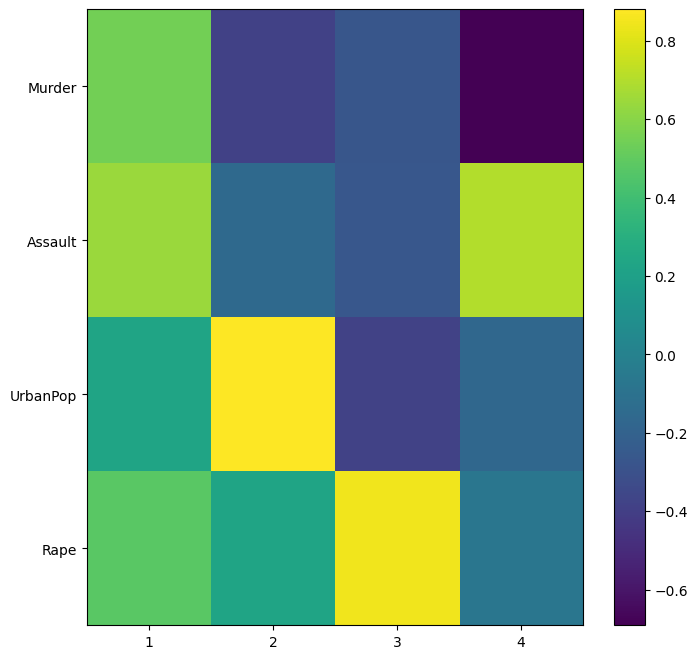

In [32]:
# Visualizar el comportamietno de las variables sobre las componentes
plt.figure(figsize=(8,8))
components = model_pca.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), np.arange(model_pca.n_components_) + 1)
plt.colorbar()
plt.show()

relacion de la varianza explciada de cada componente
[0.64272873 0.22804606 0.08097894 0.04824627]


Text(0, 0.5, 'Relacion de varianza')

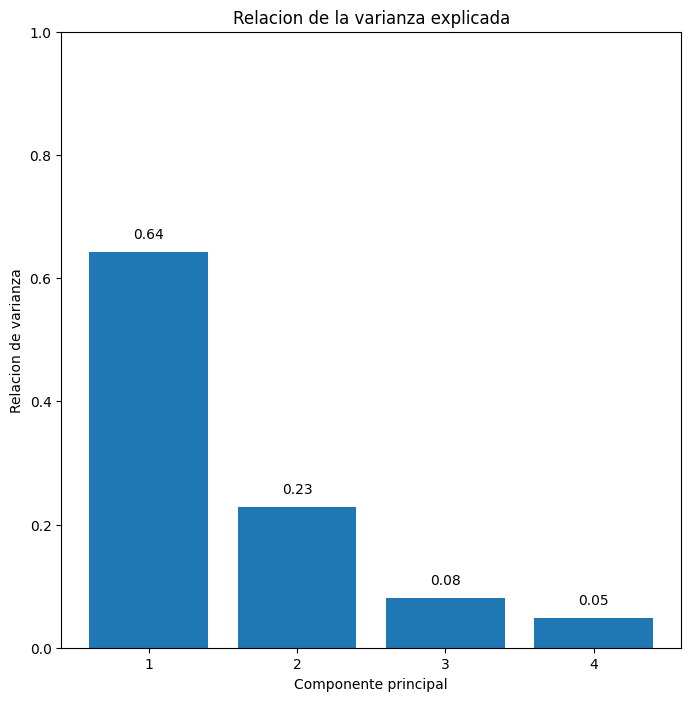

In [33]:
# Identificar varianza de cada una de las compoenntes identificadas
print('relacion de la varianza explciada de cada componente')
print(model_pca.explained_variance_ratio_)
plt.figure(figsize=(8,8))
plt.bar(x=np.arange(model_pca.n_components_) + 1, 
        height=model_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(data.columns)) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0,10), ha='center')
plt.xticks(np.arange(model_pca.n_components_) + 1)
plt.ylim(0, 1)
plt.title('Relacion de la varianza explicada')
plt.xlabel('Componente principal')
plt.ylabel('Relacion de varianza')

Relacion de la varianza acumulada
[0.64272873 0.87077478 0.95175373 1.        ]


Text(0, 0.5, 'Relacion de varianza')

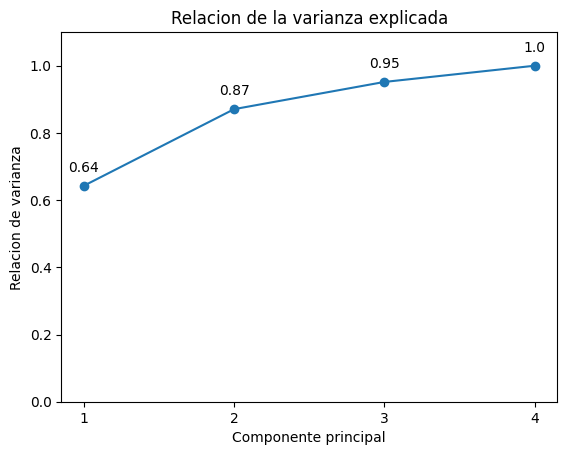

In [40]:
cumulated_var=model_pca.explained_variance_ratio_.cumsum()
print('Relacion de la varianza acumulada')
print(cumulated_var)
plt.plot(np.arange(len(data.columns))+1, cumulated_var, marker='o')
for x, y in zip(np.arange(len(data.columns)) + 1, cumulated_var):
    label = round(y, 2)
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0,10), ha='center')
plt.xticks(np.arange(model_pca.n_components_) + 1)
plt.ylim(0, 1.1)
plt.title('Relacion de la varianza explicada')
plt.xlabel('Componente principal')
plt.ylabel('Relacion de varianza')

In [42]:
# transformacion de variables
proyec= pca_pipe.transform(X=data)
proyec=pd.DataFrame(proyec, columns=['PC1', 'PC2', 'PC3', 'PC4'],index=data.index)
proyec

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.293082,-0.273177,-0.098603,-0.047938
Alaska,0.497299,-0.225498,0.501542,0.133087
Arizona,0.460302,0.201380,0.003031,0.223196
Arkansas,-0.006003,-0.275698,0.028729,0.050640
California,0.612016,0.409985,0.143261,0.093440
Colorado,0.342323,0.268101,0.268758,0.006634
Connecticut,-0.363487,0.248338,-0.167453,0.028813
Delaware,0.044244,0.073746,-0.190667,0.232168
Florida,0.802927,0.014672,-0.132437,0.015732
